# Workflow to deduplicate Detections


Map a single Drone Image to another Image.

In [6]:
%load_ext autoreload
%autoreload 2

## Setup the project

In [7]:

from pathlib import Path
from find_template_and_project_labels import single_stage_template_matching_projection
from image_template_search.util.HastyAnnotationV2 import hA_from_file, AnnotatedImage

base_path = Path("/Users/christian/data/2TB/ai-core/data/detection_deduplication/images_2024_10_07/")
assert base_path.exists(), "The base path does not exist"



annotations_file_path=Path("/Users/christian/data/2TB/ai-core/data/detection_deduplication/all_images_2024_11_10.json")


/Users/christian/PycharmProjects/hnee/image_template_search/LightGlue/lightglue/lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


## Map projected labels to the true labels of a matched image
Using the Homography of two images we can warp the image but the images to.
 

In [8]:

# tracking FMO04
drone_image = base_path / "single_images/DJI_0066.JPG"
image_2 = base_path / "single_images/DJI_0067.JPG"

images_path = base_path
output_path = base_path / "output"

hA = hA_from_file( file_path=annotations_file_path )
hA.images = [i for i in hA.images if i.image_name in [drone_image.name]]
assert len(hA.images) == 1, "There should be only a single image left"
drone_image_label = hA.images[0]

# TODO Bonus, assign the ID attribute to every label if it is not present
# This will allow us to evaluate a tracker.

2024-11-19 14:20:27.614 | INFO     | image_template_search.util.util:wrapper:146 - Loading cached result for DJI_0066 and DJI_0067
2024-11-19 14:20:27.615 | INFO     | image_template_search.image_similarity:find_patch:759 - normalised_sim: 0.7603862564563216, len(m_kpts0): 3386, len(m_kpts1): 3386
2024-11-19 14:20:27.616 | WARNING  | image_template_search.image_similarity:find_rotation_gen_cv2:478 - This is deprecated!
2024-11-19 14:20:27.616 | INFO     | image_template_search.image_similarity:find_rotation_gen_cv2:481 - RANSAC Threshold: 2
2024-11-19 14:20:27.750 | INFO     | image_template_search.image_similarity:find_patch:774 - The camera rotated: 0.57 by degrees
2024-11-19 14:20:27.751 | INFO     | find_template_and_project_labels:single_stage_template_matching_projection:63 - Found template DJI_0066 object is in the image DJI_0067


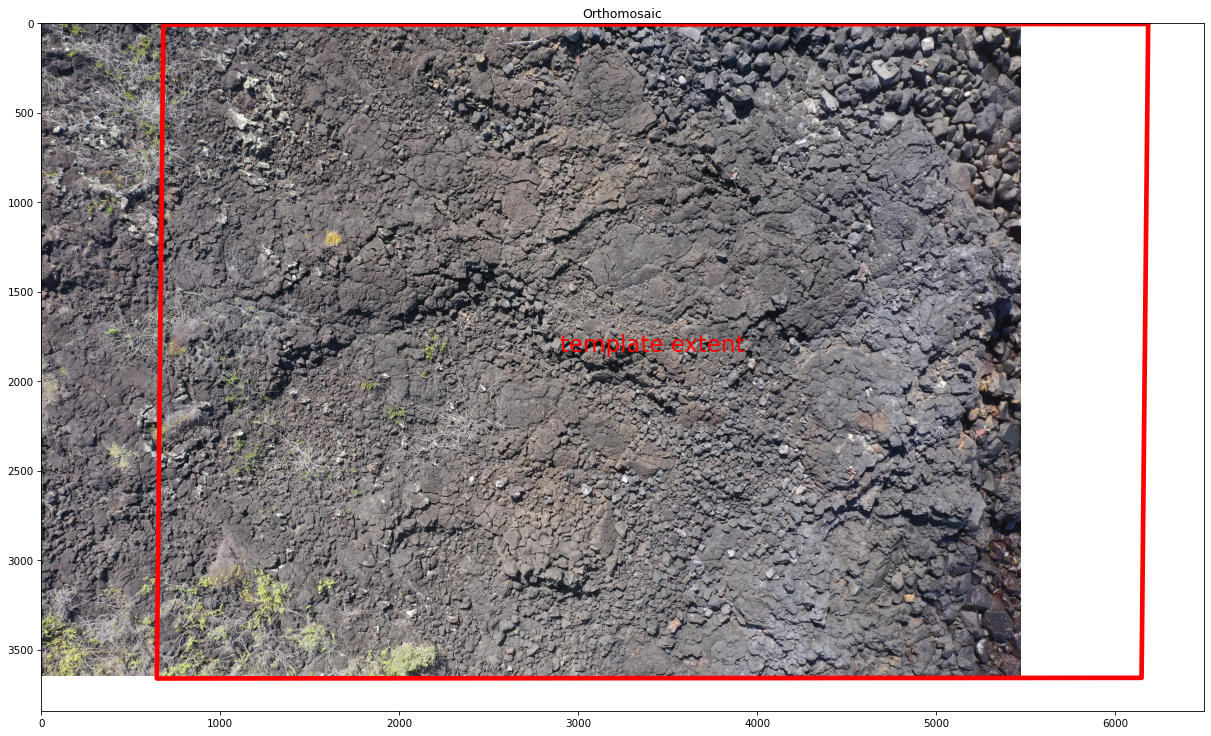

In [9]:

projected_labels = single_stage_template_matching_projection(template_image_path=drone_image,
                                                           large_image_path=image_2,
                                                           drone_image_labels=drone_image_label.labels)

In [10]:
projected_labels

[ImageLabel(id='2f6a1c24-c6e9-4bea-9641-2eda794d7bc1', class_name='iguana', bbox=[4435, 2469, 4538, 2574], polygon=None, mask=None, z_index=3, attributes={'ID': '8'}, keypoints=[]),
 ImageLabel(id='3f61f6ad-a11c-4c24-90ec-afbfa6d75b73', class_name='iguana', bbox=[5241, 2240, 5338, 2357], polygon=None, mask=None, z_index=4, attributes={'ID': '9'}, keypoints=[]),
 ImageLabel(id='65a143f5-049d-4a57-b9d7-72cf8cc40c44', class_name='iguana', bbox=[3824, 800, 3882, 950], polygon=None, mask=None, z_index=0, attributes={'ID': '7'}, keypoints=[]),
 ImageLabel(id='ec52344c-841f-41d0-8705-5775089fd448', class_name='iguana', bbox=[2970, 145, 3028, 319], polygon=None, mask=None, z_index=1, attributes={'ID': '1'}, keypoints=[]),
 ImageLabel(id='f3ac3a98-82b3-4d8e-aa80-78e152c05a44', class_name='iguana', bbox=[4903, 198, 4978, 259], polygon=None, mask=None, z_index=2, attributes={'ID': '11'}, keypoints=[])]

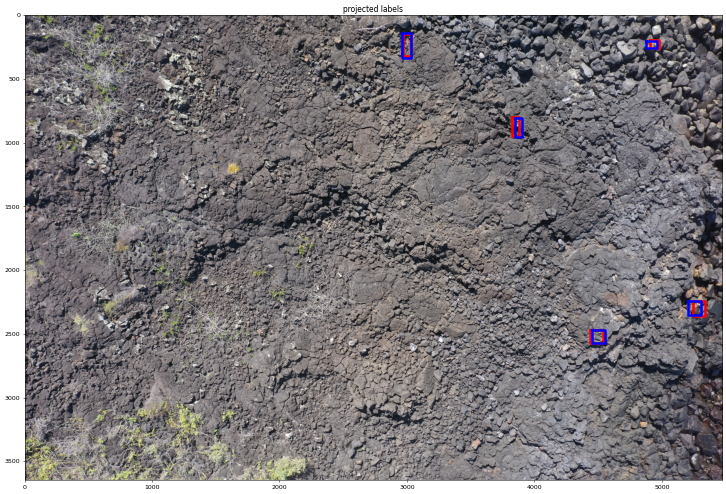

In [11]:
from matplotlib import pyplot as plt
from image_template_search.util.util import visualise_image, visualise_polygons

hA_gt = hA_from_file(file_path=annotations_file_path)
hA_gt.images = [i for i in hA_gt.images if i.image_name in [image_2.name]]
labels_gt = hA_gt.images[0].labels
assert len(hA_gt.images) == 1, "There should be only a single image left"
gt_image_label = hA_gt.images[0]

# debug_hasty_fiftyone(hA, images_path)
ax_p = visualise_image(image_path=image_2, show=False, title="projected labels", dpi=45)
ax_p = visualise_polygons(polygons=[x.bbox_polygon for x in projected_labels], ax=ax_p, linewidth=4, color="red", show=False)
ax_p = visualise_polygons(polygons=[x.bbox_polygon for x in labels_gt], ax=ax_p, linewidth=4, color="blue", show=False)

plt.show()